In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("LoanData_raw.csv")
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17,12,176.0,9.3,11.359392,5.008608,1
1,27.0,1.0,10,6,31.0,17.3,1.362202,4.000798,0
2,40.0,1.0,15,7,NaN,5.5,0.856075,2.168925,0
3,41.0,NaN,15,14,120.0,2.9,2.658720,0.821280,0
4,24.0,2.0,2,0,28.0,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6,15,27.0,4.6,0.262062,0.979938,1
696,29.0,2.0,6,4,21.0,11.5,0.369495,2.045505,0
697,33.0,1.0,15,3,32.0,7.6,0.491264,1.940736,0
698,45.0,1.0,19,22,77.0,8.4,2.302608,4.165392,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       681 non-null    float64
 1   ed        680 non-null    float64
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    663 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 49.3+ KB


In [4]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
count,681.000000,680.000000,700.000000,700.000000,663.00000,700.000000,700.000000,700.000000
mean,34.898678,1.717647,8.388571,8.268571,45.74359,10.260571,1.553553,3.058209
std,8.861849,0.925652,6.658039,6.821609,37.44108,6.827234,2.117197,3.287555
min,20.000000,1.000000,0.000000,0.000000,14.00000,0.400000,0.011696,0.045584
25%,28.000000,1.000000,3.000000,3.000000,24.00000,5.000000,0.369059,1.044178
50%,34.000000,1.000000,7.000000,7.000000,34.00000,8.600000,0.854869,1.987567
75%,40.000000,2.000000,12.000000,12.000000,54.50000,14.125000,1.901955,3.923065
max,136.000000,5.000000,31.000000,34.000000,446.00000,41.300000,20.561310,27.033600


#### Age column has inconsistent values. So, to correct it, we will take age range 18-70 years.

In [5]:
df= df[(df['age']>=18) & (df['age']<=70)]

In [6]:
categorical_columns= ['ed','default']
for col in categorical_columns:
    print(df[col].value_counts(), end="\n\n\n")

ed
1.0    354
2.0    184
3.0     83
4.0     35
5.0      5
Name: count, dtype: int64


default
0      499
1      179
'0'      1
:0       1
Name: count, dtype: int64




In [7]:
df['default']= df['default'].replace({"'0'":0 , ":0":0})
df['default']= df['default'].astype('int')

In [8]:
print("shape of dataset: ", df.shape)

shape of dataset:  (680, 9)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       680 non-null    float64
 1   ed        661 non-null    float64
 2   employ    680 non-null    int64  
 3   address   680 non-null    int64  
 4   income    644 non-null    float64
 5   debtinc   680 non-null    float64
 6   creddebt  680 non-null    float64
 7   othdebt   680 non-null    float64
 8   default   680 non-null    int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 50.5 KB


#### After removing inconsistent values of age from our dataset, we have 680 rows remain. Now, there are two columns having missing values and those columns are ed(Education level) and income. 

#### Imputing Missing values

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterative_imputer = IterativeImputer(random_state=42)

df= pd.DataFrame(iterative_imputer.fit_transform(df), columns=df.columns)

In [11]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.00000,17.0,12.0,176.000000,9.3,11.359392,5.008608,1.0
1,27.0,1.00000,10.0,6.0,31.000000,17.3,1.362202,4.000798,0.0
2,40.0,1.00000,15.0,7.0,54.440182,5.5,0.856075,2.168925,0.0
3,41.0,2.24503,15.0,14.0,120.000000,2.9,2.658720,0.821280,0.0
4,24.0,2.00000,2.0,0.0,28.000000,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
675,36.0,2.00000,6.0,15.0,27.000000,4.6,0.262062,0.979938,1.0
676,29.0,2.00000,6.0,4.0,21.000000,11.5,0.369495,2.045505,0.0
677,33.0,1.00000,15.0,3.0,32.000000,7.6,0.491264,1.940736,0.0
678,45.0,1.00000,19.0,22.0,77.000000,8.4,2.302608,4.165392,0.0


In [12]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,34.750000,1.718648,8.345588,8.117647,45.747053,10.306324,1.560848,3.050070,0.263235
std,7.973215,0.917063,6.692024,6.732047,37.353870,6.816371,2.136379,3.259563,0.440713
min,20.000000,1.000000,0.000000,0.000000,-5.432112,0.400000,0.011696,0.045584,0.000000
25%,28.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.369059,1.047234,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.800000,0.853432,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,54.110045,14.200000,1.919539,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [13]:
df=df[df['income']>0]

In [14]:
df['ed'].value_counts()

ed
1.000000    353
2.000000    184
3.000000     83
4.000000     35
5.000000      5
1.486103      1
2.135096      1
1.786947      1
1.793765      1
1.507614      1
2.015814      1
1.581202      1
1.220020      1
1.539258      1
1.688999      1
1.137946      1
1.634120      1
1.816031      1
1.837040      1
1.927748      1
1.833688      1
1.801328      1
2.245030      1
1.692576      1
Name: count, dtype: int64

In [15]:
bins= [1, 1.6, 2.6, 3.6, 4.6, 5.6]
labels= [1,2,3,4,5]
df['ed']= pd.cut(df['ed'], bins= bins, labels= labels, right= False)

In [16]:
df['ed'].value_counts()
df['ed']= df['ed'].astype('int')
df['age']= df['age'].astype('int')
df['employ']= df['employ'].astype('int')
df['address']= df['address'].astype('int')
df['default']= df['default'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679 entries, 0 to 679
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       679 non-null    int32  
 1   ed        679 non-null    int32  
 2   employ    679 non-null    int32  
 3   address   679 non-null    int32  
 4   income    679 non-null    float64
 5   debtinc   679 non-null    float64
 6   creddebt  679 non-null    float64
 7   othdebt   679 non-null    float64
 8   default   679 non-null    int32  
dtypes: float64(4), int32(5)
memory usage: 39.8 KB


#### Analysis

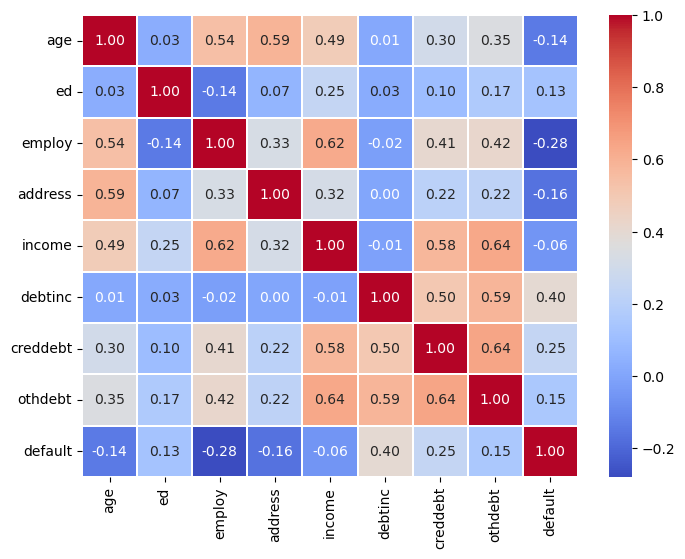

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm', linewidth= 0.2, fmt= "0.2f")
plt.show()

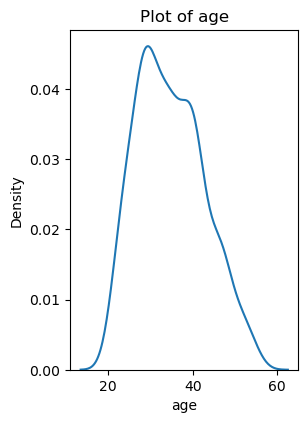

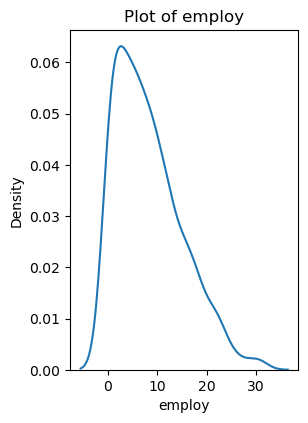

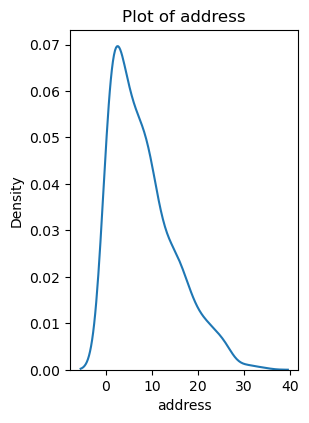

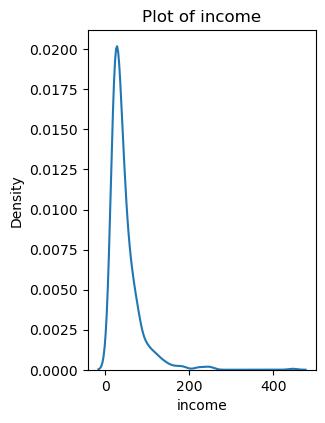

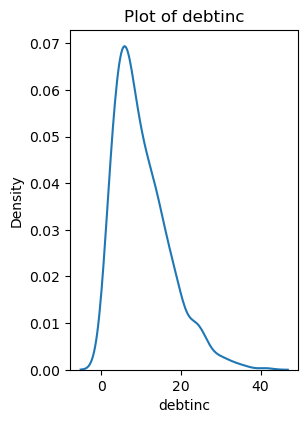

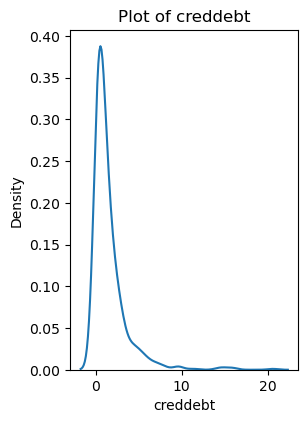

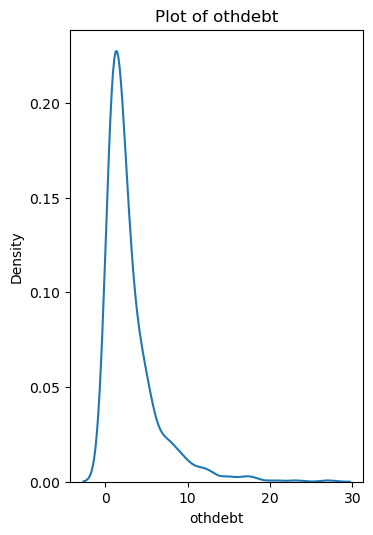

In [19]:
cols=['age', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']

length= len(cols)
row= (length+2)//3

for i, variable in enumerate(cols):
    plt.figure(figsize=(10,15))
    plt.subplot(row,3,i+1)
    plt.title(f'Plot of {variable}')
    sns.kdeplot(df[variable])
    
plt.tight_layout()
plt.show()    

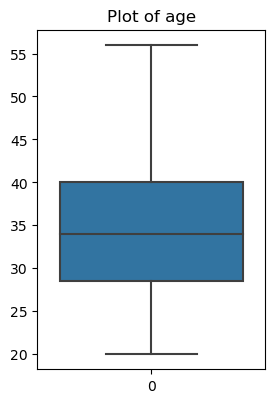

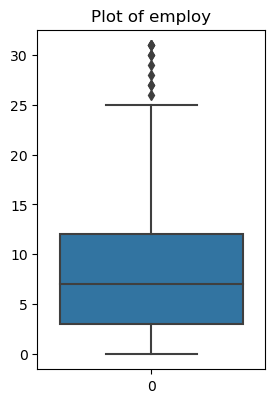

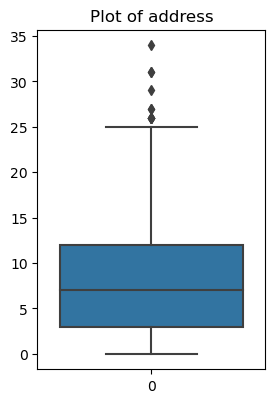

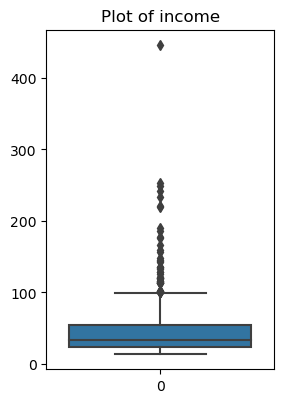

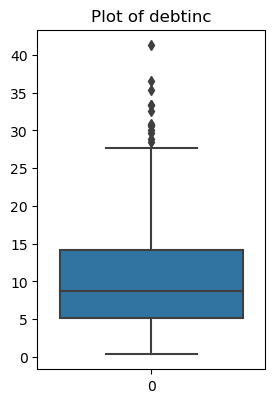

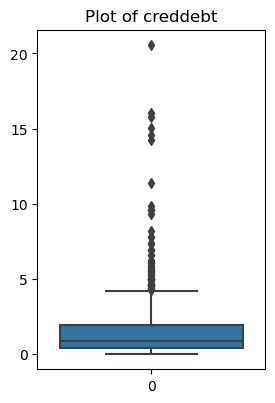

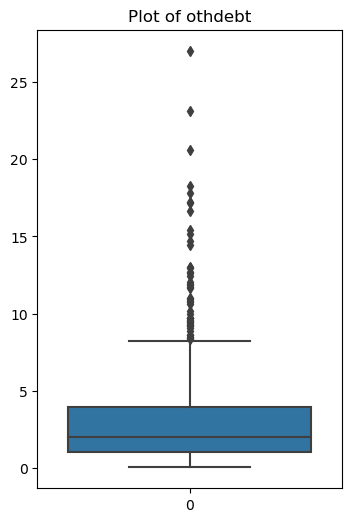

In [20]:
cols=['age', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']

length= len(cols)
row= (length+2)//3

for i, variable in enumerate(cols):
    plt.figure(figsize=(10,15))
    plt.subplot(row,3,i+1)
    plt.title(f'Plot of {variable}')
    sns.boxplot(df[variable])
    
plt.tight_layout()
plt.show()    

#### Handling Outliers

In [61]:
def outliers(df,cols,k=1.5):
    outliers_dict={}
    for i in cols:
        q1= df[i].quantile(0.25)
        q3= df[i].quantile(0.75)
        iqr= q3-q1
        outlier= df[(df[i]<(q1-k*iqr)) | (df[i]>(q3+k*iqr))]
#         outliers_dict[col]= outlier
    return outlier
        
outliers(df,cols)     

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
6,39,1,20,9,101.896183,30.6,3.833874,16.668126,0
25,43,1,25,21,64.000000,16.7,0.951232,9.736768,0
61,32,2,11,6,94.519277,23.3,7.758900,9.716100,1
71,47,1,13,25,51.000000,23.8,3.738504,8.399496,0
108,42,2,12,11,51.000000,21.4,2.411994,8.502006,0
158,40,2,13,11,102.000000,18.9,6.226794,13.051206,1
199,40,3,16,6,116.000000,12.1,1.614140,12.421860,0
206,41,2,21,22,145.000000,12.2,3.237270,14.452730,0
210,48,3,17,26,113.000000,12.0,3.376440,10.183560,0
211,29,3,5,6,70.000000,19.9,3.176040,10.753960,1


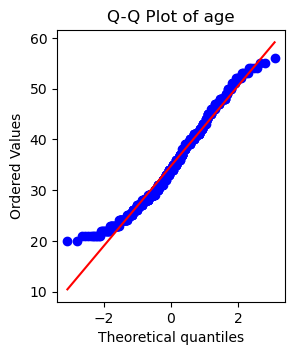

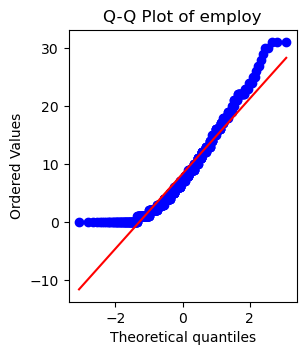

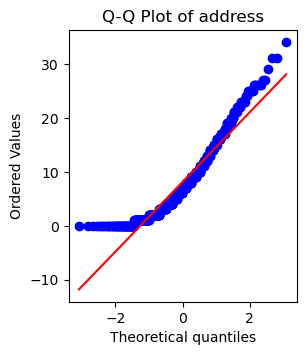

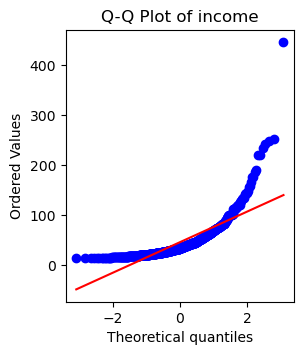

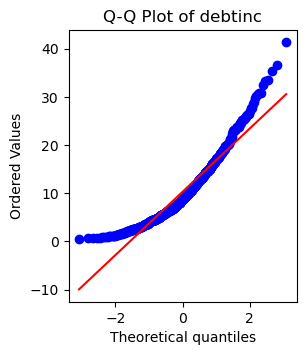

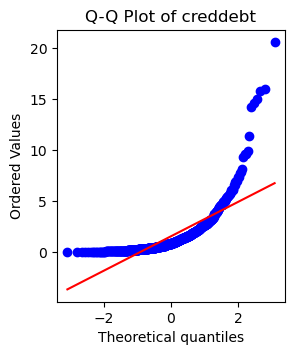

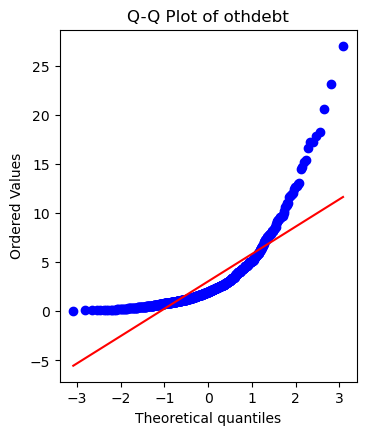

In [21]:
import scipy.stats as stats

for j,var in enumerate(cols):
    plt.figure(figsize=(10,12))
    plt.subplot(row,3,j+1)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    
plt.tight_layout()   
plt.show()

#### train_test_split

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X= df.iloc[:,:-1]
y=df['default']

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)

X_train Shape:  (543, 8)
X_test Shape:  (136, 8)


In [24]:
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [25]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [26]:
model= Sequential()

model.add(Dense(64,activation='relu',input_dim=8))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [27]:
adam= Adam(learning_rate=0.001)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])

In [29]:
old_weights= model.get_weights()[0]
callback= EarlyStopping(
    monitor= "val_loss",
    min_delta= 0.0001,
    patience= 20,
    verbose= 1,
    mode= "auto",
    baseline=None,
    restore_best_weights= True)

In [30]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test), batch_size=1, callbacks= callback)

Epoch 1/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7240 - loss: 0.6268 - val_accuracy: 0.7574 - val_loss: 0.4970
Epoch 2/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7078 - loss: 0.5443 - val_accuracy: 0.7574 - val_loss: 0.4499
Epoch 3/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7113 - loss: 0.5342 - val_accuracy: 0.7574 - val_loss: 0.4705
Epoch 4/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7516 - loss: 0.4659 - val_accuracy: 0.7794 - val_loss: 0.4657
Epoch 5/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7656 - loss: 0.5211 - val_accuracy: 0.7574 - val_loss: 0.4284
Epoch 6/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7683 - loss: 0.4479 - val_accuracy: 0.7574 - val_loss: 0.4353
Epoch 7/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7428 - loss: 0.5123 - val_accuracy: 0.7647 - val_loss: 0.4334
Epoch 8/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7486 - loss: 0.4795 - val_acc

In [31]:
model.evaluate(X_test_scaled,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8344 - loss: 0.3716  


[0.371131032705307, 0.8235294222831726]

In [32]:
y_pred_probab= model.predict(X_test_scaled)
y_pred_final= np.where(y_pred_probab>0.5,1,0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [33]:
accuracy_score(y_test,y_pred_final)

0.8235294117647058

In [34]:
new_weights= model.get_weights()[0]
# new_weights

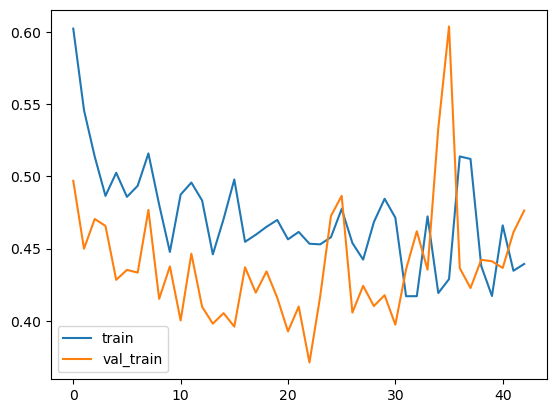

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_train')
plt.legend()
plt.show()

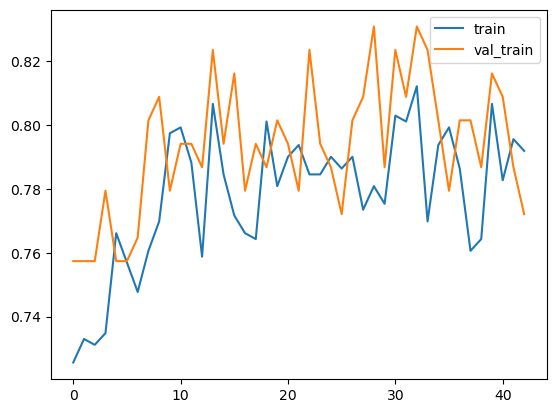

In [36]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val_train')
plt.legend()
plt.show()

#### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)
y_pred_dt= dt.predict(X_test_scaled)
accuracy_score(y_pred_dt,y_test)

0.7132352941176471

#### Hyperparameter Tuning

In [38]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [7,10],
    'min_samples_split': [18,25,20],
    'min_samples_leaf': [10,12,18]
}

In [39]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5, 
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7, 10],
                         'min_samples_leaf': [10, 12, 18],
                         'min_samples_split': [18, 25, 20],
                         'splitter': ['best', 'random']},
             verbose=2)

In [40]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 12,
 'min_samples_split': 18,
 'splitter': 'random'}

In [41]:
best_clf = grid_search.best_estimator_
grid_pred_dt = best_clf.predict(X_test_scaled)
accuracy_score(grid_pred_dt, y_test)

0.7867647058823529

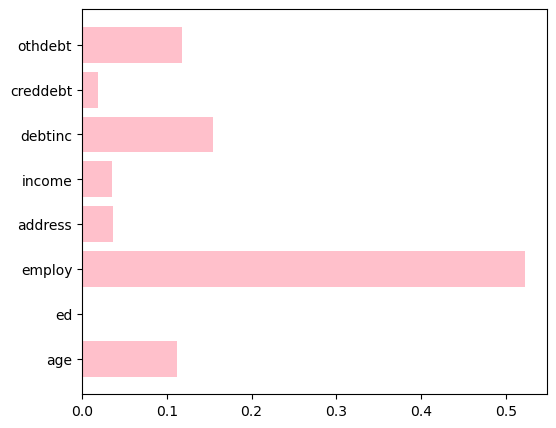

In [42]:
feature_importance= best_clf.feature_importances_
features= X_train.columns

plt.figure(figsize=(6,5))
plt.barh(features, feature_importance, color='pink')
plt.show()

#### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()

rf.fit(X_train_scaled,y_train)
y_pred_rf= rf.predict(X_test_scaled)
accuracy_score(y_pred_rf,y_test)

0.8161764705882353

In [44]:
param_grid= {
    'max_features':['sqrt','log2',None],
    'max_samples':[0.5, 0.75],
    'max_depth':[5,7],
    'min_samples_split':[10,15,25],
}

rf_grid= GridSearchCV(estimator= rf,
                     param_grid=param_grid,
                     verbose=2,
                      cv=5,
                     n_jobs=-1)

In [45]:
rf_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.5, 0.75],
                         'min_samples_split': [10, 15, 25]},
             verbose=2)

In [46]:
best_rf= rf_grid.best_estimator_

y_grid_rf= best_rf.predict(X_test_scaled)
accuracy_score(y_test,y_grid_rf)

0.7941176470588235

In [47]:
rf_grid.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'max_samples': 0.5,
 'min_samples_split': 15}

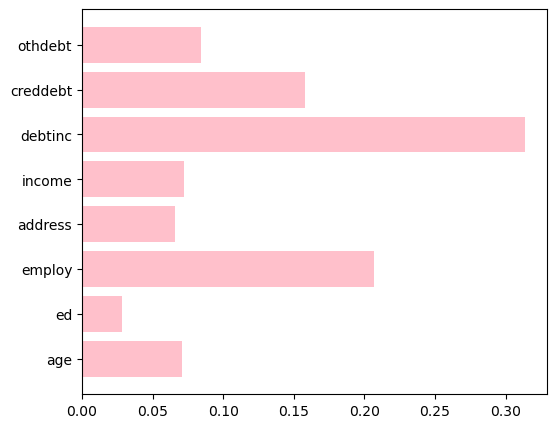

In [48]:
feature_importance= best_rf.feature_importances_
features= X_train.columns

plt.figure(figsize=(6,5))
plt.barh(features, feature_importance, color='pink')
plt.show()